## Predictive Modelling of Transcriptomic Responses to Gene Perturbations using AI

### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

### Load the Dataseet and Preprocessing

In [2]:
# Load the dataset
df = pd.read_csv('normalized_fibroblast_clusters-2.csv', index_col=0)
df

AAACCCAAGACTTCCA-1_1  AAACCCAAGATAGTGT-1_1  AAACCCAAGCAGGGAG-1_1  \
Cd74                0.627964              0.517420              0.513816   
H2-Aa               0.397834              0.417664              0.303373   
H2-Eb1              0.305610              0.288359              0.293986   
Fabp4               0.155171              0.083537              0.070162   
Acta2               0.022580              0.053589              0.078783   
...                      ...                   ...                   ...   
Hspe1               1.883837              1.899975              0.398732   
Dmxl1               0.378681             -0.188290             -0.229662   
Hacd3               0.000901             -0.069198              0.042718   
Gpr153             -0.131880              0.078953             -0.000893   
Rcl1               -0.034447             -0.040739              1.117460   

        AAACCCACAAATGCGG-1_1  AAACCCACACTCCTTG-1_1  AAACCCACAGTAGTGG-1_1  \
Cd74                0.575434              0.593971              0.625047   
H2-Aa               0.306549              0.286403              0.415807   
H2-Eb1              0.248610              0.291936              0.311187   
Fabp4               0.110922             -0.097374              0.089305   
Acta2               0.116282              0.046160              0.152203   
...                      ...                   ...                   ...   
Hspe1               1.513663              2.085492              2.022126   
Dmxl1              -0.204276             -0.112015              0.400999   
Hacd3               0.006180             -0.064381             -0.206416   
Gpr153              1.086025              0.343959              0.200087   
Rcl1               -0.062553              0.032156              0.396795   

        AAACCCAGTACTCCCT-1_1  AAACCCAGTCATCTAG-1_1  AAACCCAGTCGGAAAC-1_1  \
Cd74                0.489035              0.480977              0.557635   
H2-Aa               0.322265              0.299492              0.355155   
H2-Eb1              0.266224              0.275123              0.304908   
Fabp4               0.057868              0.013686             -0.055889   
Acta2               0.024128              0.086158              0.064832   
...                      ...                   ...                   ...   
Hspe1               1.244656              1.540496              1.906978   
Dmxl1              -0.155090              1.090761              0.454686   
Hacd3               0.585217              0.533192             -0.054372   
Gpr153              0.024450             -0.106679             -0.179479   
Rcl1               -0.004524             -0.031594              0.762821   

        AAACCCAGTGCAAGAC-1_1  ...  TTTGGTTAGTGTTCAC-1_21  \
Cd74                0.528565  ...               0.482509   
H2-Aa               0.339343  ...               0.364739   
H2-Eb1              0.347165  ...               0.442727   
Fabp4               0.075950  ...               0.128863   
Acta2               0.068160  ...               0.521517   
...                      ...  ...                    ...   
Hspe1               1.562839  ...               1.626773   
Dmxl1              -0.085234  ...              -0.022023   
Hacd3               0.937862  ...               0.164556   
Gpr153             -0.124911  ...              -0.216125   
Rcl1                0.572248  ...              -0.054592   

        TTTGGTTCAAGGCAAC-1_21  TTTGGTTCAATAGGAT-1_21  TTTGGTTCACCTTCGT-1_21  \
Cd74                 0.352181               0.449166               0.474246   
H2-Aa                0.344088               0.376877               0.234666   
H2-Eb1               0.353034               0.288513               0.120182   
Fabp4                0.045634               0.593521               0.062766   
Acta2                2.123243               0.512953              -0.015679   
...                       ...                    ...                    ..

In [3]:
# Basic statistics
df.describe()

AAACCCAAGACTTCCA-1_1  AAACCCAAGATAGTGT-1_1  AAACCCAAGCAGGGAG-1_1  \
count           2000.000000           2000.000000           2000.000000   
mean               0.400506              0.409638              0.365504   
std                0.731655              0.778029              0.786142   
min               -0.681798             -0.949728             -1.020767   
25%               -0.007750             -0.015622             -0.040476   
50%                0.054269              0.039801              0.027473   
75%                0.579794              0.641765              0.674123   
max                6.091959              5.720716              5.502778   

       AAACCCACAAATGCGG-1_1  AAACCCACACTCCTTG-1_1  AAACCCACAGTAGTGG-1_1  \
count           2000.000000           2000.000000           2000.000000   
mean               0.406073              0.381873              0.418628   
std                0.768238              0.696315              0.711857   
min               -0.856250             -0.636013             -0.656557   
25%               -0.019141              0.002957              0.003609   
50%                0.046966              0.067764              0.126507   
75%                0.654354              0.518112              0.588423   
max                6.095395              5.466762              5.827047   

       AAACCCAGTACTCCCT-1_1  AAACCCAGTCATCTAG-1_1  AAACCCAGTCGGAAAC-1_1  \
count           2000.000000           2000.000000           2000.000000   
mean               0.395388              0.373972              0.385388   
std                0.724702              0.714763              0.756132   
min               -0.496816             -0.963126             -0.981493   
25%               -0.003229             -0.016044             -0.012905   
50%                0.058337              0.048867              0.044319   
75%                0.580021              0.582835              0.621172   
max                5.976390              6.487849              4.902950   

       AAACCCAGTGCAAGAC-1_1  ...  TTTGGTTAGTGTTCAC-1_21  \
count           2000.000000  ...            2000.000000   
mean               0.384729  ...               0.405139   
std                0.732807  ...               0.691765   
min               -0.798792  ...              -0.359372   
25%               -0.013010  ...               0.019793   
50%                0.050764  ...               0.144210   
75%                0.572193  ...               0.461602   
max                5.832898  ...               5.682743   

       TTTGGTTCAAGGCAAC-1_21  TTTGGTTCAATAGGAT-1_21  TTTGGTTCACCTTCGT-1_21  \
count            2000.000000            2000.000000            2000.000000   
mean                0.340322               0.433201               0.356221   
std                 0.597024               0.698110               0.656204   
min                -1.176903              -0.481835              -0.576765   
25%                 0.006373               0.016950               0.002553   
50%                 0.160356               0.170479               0.132290   
75%                 0.467968               0.560350               0.456134   
max                 4.362912               5.453780               5.743795   

       TTTGGTTGTGAGTAAT-1_21  TTTGGTTGTTTGGAAA-1_21  TTTGGTTTCCGTATGA-1_21  \
count            2000.000000            2000.000000            2000.000000   
mean                0.401854               0.365670               0.404920   
std                 0.692094               0.665439               0.632540   
min                -0.504405              -0.534467              -0.449209   
25%                 0.004562               0.000821               0.029579   
50%                 0.152339               0.137247               0.182863   
75%                 0.517948               0.448715               0.512225   
max                 5.032052               5.220045               5.196080   

       TTTGTTGCACATTACG-1_21  TTTGTTGGTTG

In [4]:
# Check for NaN values
print(df.isna().sum())

AAACCCAAGACTTCCA-1_1     0
AAACCCAAGATAGTGT-1_1     0
AAACCCAAGCAGGGAG-1_1     0
AAACCCACAAATGCGG-1_1     0
AAACCCACACTCCTTG-1_1     0
                        ..
TTTGGTTGTTTGGAAA-1_21    0
TTTGGTTTCCGTATGA-1_21    0
TTTGTTGCACATTACG-1_21    0
TTTGTTGGTTGGACCC-1_21    0
TTTGTTGTCTGCGGAC-1_21    0
Length: 73602, dtype: int64


#### Hitmap

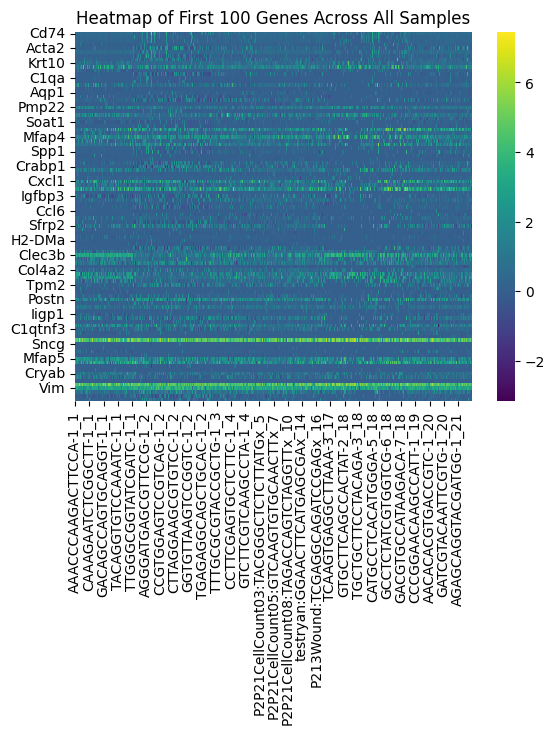

In [5]:
# Heatmap of a subset of genes
sns.heatmap(df.iloc[:100, :], cmap='viridis')
plt.title('Heatmap of First 100 Genes Across All Samples')
plt.show()

#### PCA

(73602, 50)


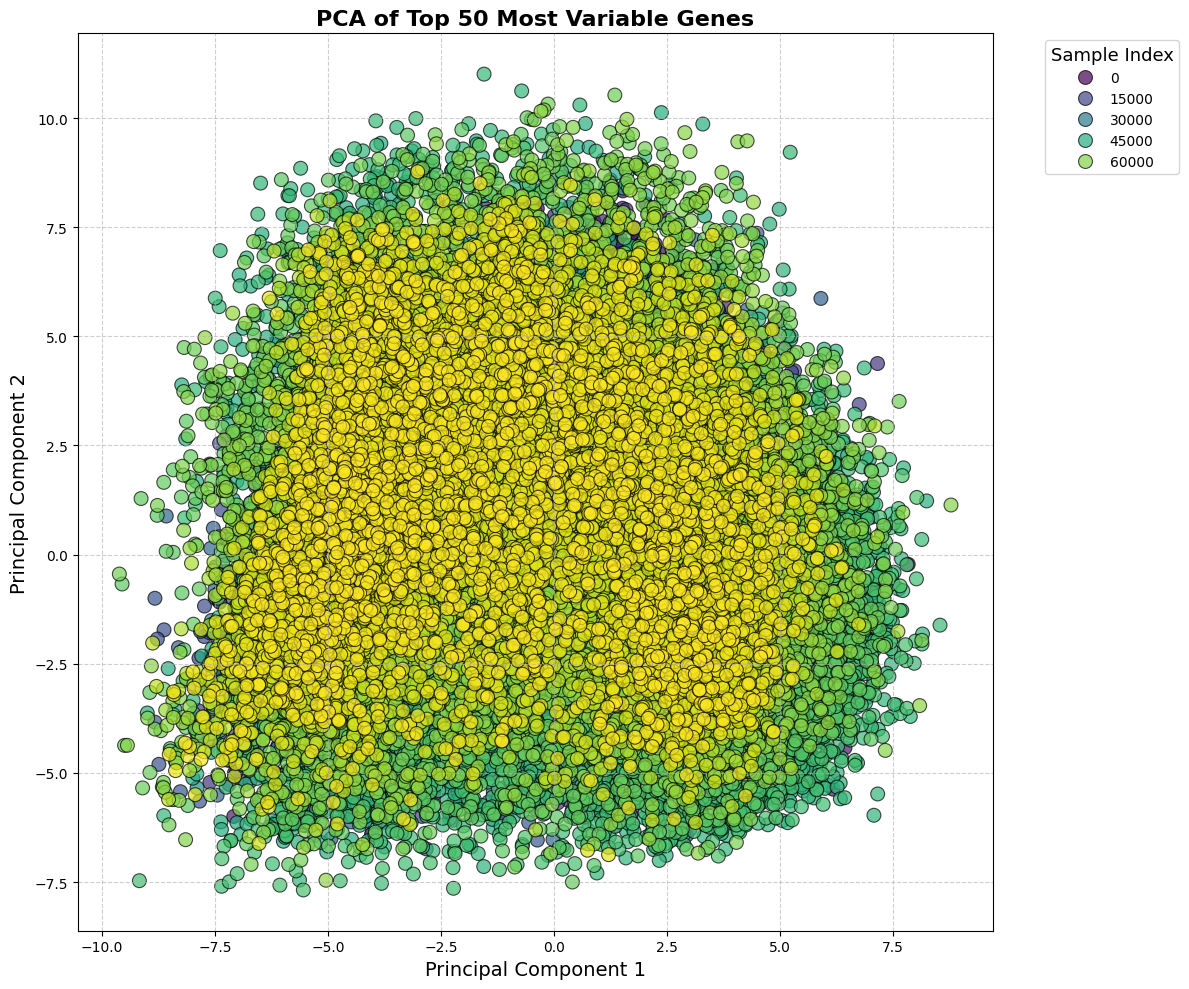

In [6]:
# Selecting the top 50 most variable genes
df_var = df.var(axis=1).sort_values(ascending=False)
top_genes = df_var.index[:50]
df_selected = df.loc[top_genes]

# Performing PCA for dimensionality reduction
pca = PCA(n_components=50)
df_pca = pca.fit_transform(df_selected.T)  # Transpose for samples x features
print(df_pca.shape)

# Convert the PCA result into a DataFrame for plotting
df_pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Plotting the first two principal components with enhanced visuals
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    data=df_pca_df, 
    hue=df_pca_df.index,  
    palette='viridis',    
    marker='o',           
    edgecolor='k',        
    s=100,                
    alpha=0.7             
)
plt.title('PCA of Top 50 Most Variable Genes', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Sample Index', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.6)  # Adding grid for better readability
plt.tight_layout()  # Adjust layout to fit elements
plt.show()


#### t-SNE

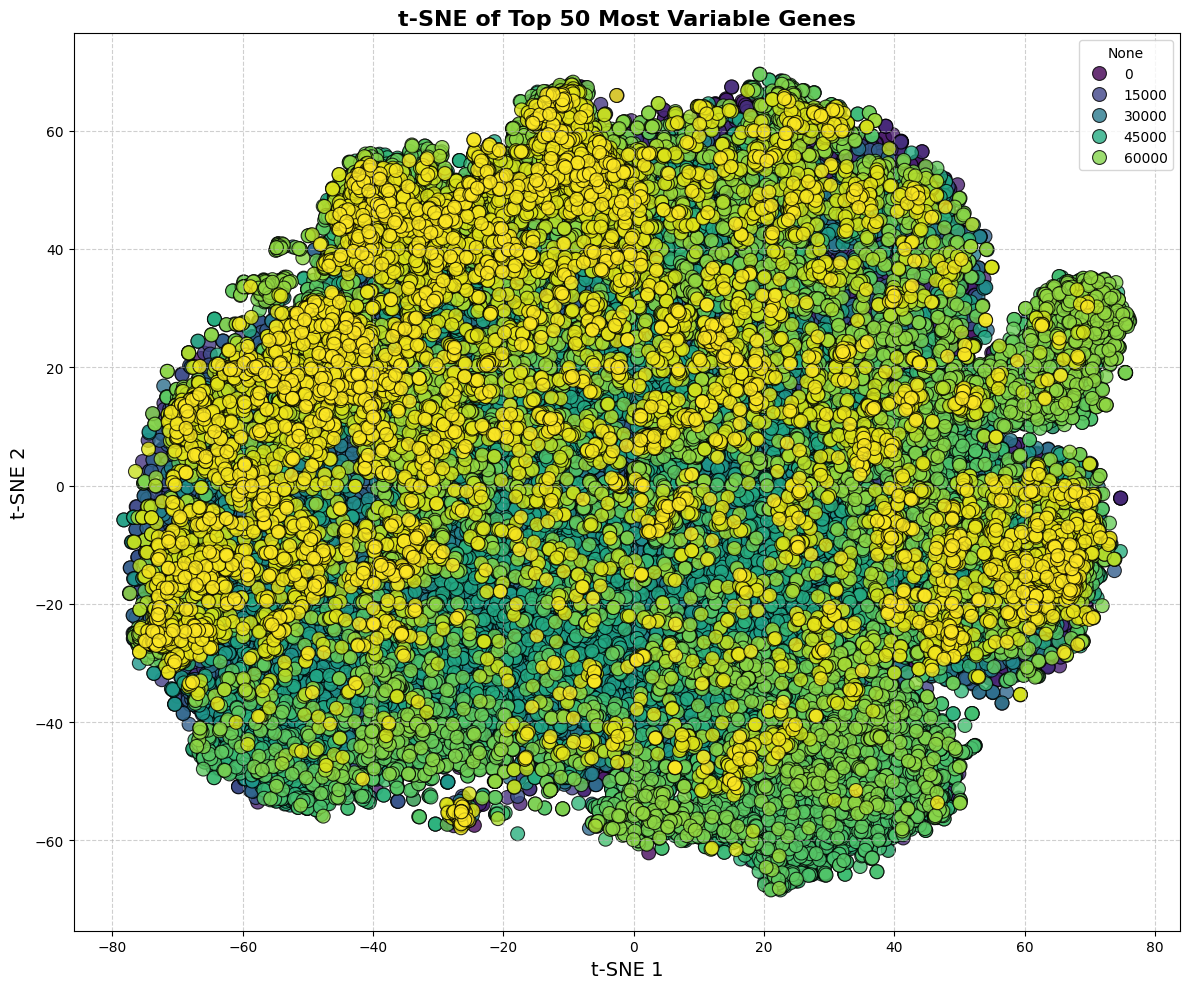

In [7]:
# Selecting the top 50 most variable genes 
df_var = df.var(axis=1).sort_values(ascending=False)
top_genes = df_var.index[:50]
df_selected = df.loc[top_genes]

# Performing t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_selected.T)  # Transpose for samples x features

# Convert the t-SNE result into a DataFrame for easier plotting
df_tsne_df = pd.DataFrame(df_tsne, columns=['t-SNE 1', 't-SNE 2'])

# Plotting the t-SNE results with enhanced visuals
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='t-SNE 1', 
    y='t-SNE 2', 
    data=df_tsne_df,
    hue=df_tsne_df.index,
    palette='viridis',   
    marker='o',         
    edgecolor='k',      
    s=100,              
    alpha=0.8           
)
plt.title('t-SNE of Top 50 Most Variable Genes', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)  # Adding grid for better readability
plt.tight_layout()  # Adjust layout to fit elements
plt.show()


#### Auto Encoder

In [8]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.T) 

# Define the size of the encoded representation
encoding_dim = 50  

# Building the autoencoder model
input_dim = data_scaled.shape[1]  

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = models.Model(input_layer, decoded)

# Encoder model to extract the encoded representation
encoder = models.Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(data_scaled, data_scaled,
                epochs=100,
                batch_size=64,
                shuffle=True,
                validation_split=0.2)

# Get the encoded (compressed) representation of the input data
encoded_data = encoder.predict(data_scaled)
encoded_df = pd.DataFrame(encoded_data, index=df.columns)

print(f"Original data shape: {data_scaled.shape}")
print(f"Encoded data shape: {encoded_data.shape}")

Epoch 1/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0719 - val_loss: 0.5924
Epoch 2/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0117 - val_loss: 0.5850
Epoch 3/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0047 - val_loss: 0.5829
Epoch 4/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9964 - val_loss: 0.5817
Epoch 5/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9978 - val_loss: 0.5808
Epoch 6/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9950 - val_loss: 0.5798
Epoch 7/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9932 - val_loss: 0.5789
Epoch 8/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9886 - val_loss: 0.5783
Epoch 9/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9906 - val_loss: 0.5775
Epoch 10/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9898 - val_loss: 0.5771
Epoch 11/100
921/921 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9877 - val_loss: 0.5766
Epoch 12/100
921/921 ━━━━━━━━━━━━━━━━━━━━

#### Combined Features

In [9]:
# Combine all features
combined_features = np.concatenate([df_pca_df, df_tsne_df, encoded_df], axis=1)

### Model Training and Evaluation

#### Target Genes

In [12]:
target_gene= ['Col1a1']

#### Deep Neural Network Model Using Combined Features

Epoch 1/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - loss: 1.0994 - mae: 0.6442 - val_loss: 0.1331 - val_mae: 0.3045
Epoch 2/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - loss: 0.0904 - mae: 0.2340 - val_loss: 0.0600 - val_mae: 0.2065
Epoch 3/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - loss: 0.0327 - mae: 0.1409 - val_loss: 0.0299 - val_mae: 0.1515
Epoch 4/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - loss: 0.0082 - mae: 0.0705 - val_loss: 0.0049 - val_mae: 0.0576
Epoch 5/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 328us/step - loss: 0.0021 - mae: 0.0342 - val_loss: 0.0961 - val_mae: 0.2977
Epoch 6/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - loss: 0.0055 - mae: 0.0394 - val_loss: 0.0038 - val_mae: 0.0567
Epoch 7/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - loss: 0.0014 - mae: 0.0260 - val_loss: 5.8826e-04 - val_mae: 0.0176
Epoch 8/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - loss: 0.0014 - mae: 0.0280 - val_loss: 0.0012 - val_mae: 0.0272
Epoch 9/50
1841/1841

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        13,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,661 (276.02 KB)

 Trainable params: 23,553 (92.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,108 (184.02 KB)

Predictions:  [[3.9782677]
 [5.162541 ]
 [3.2855587]
 [1.4998164]
 [4.9892488]]
MAE: 0.0343
RMSE: 0.0350
MSE: 0.0012
R2: 0.9987


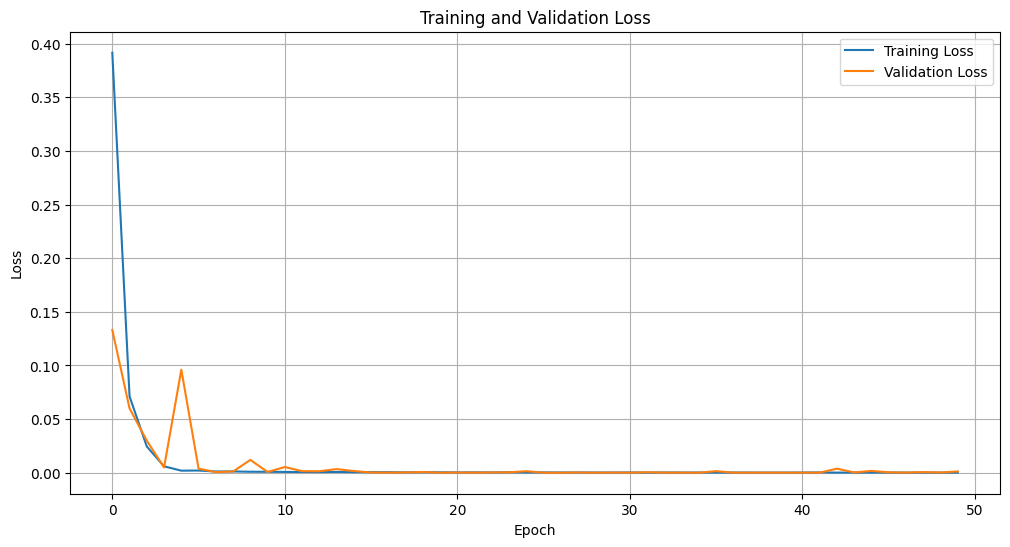

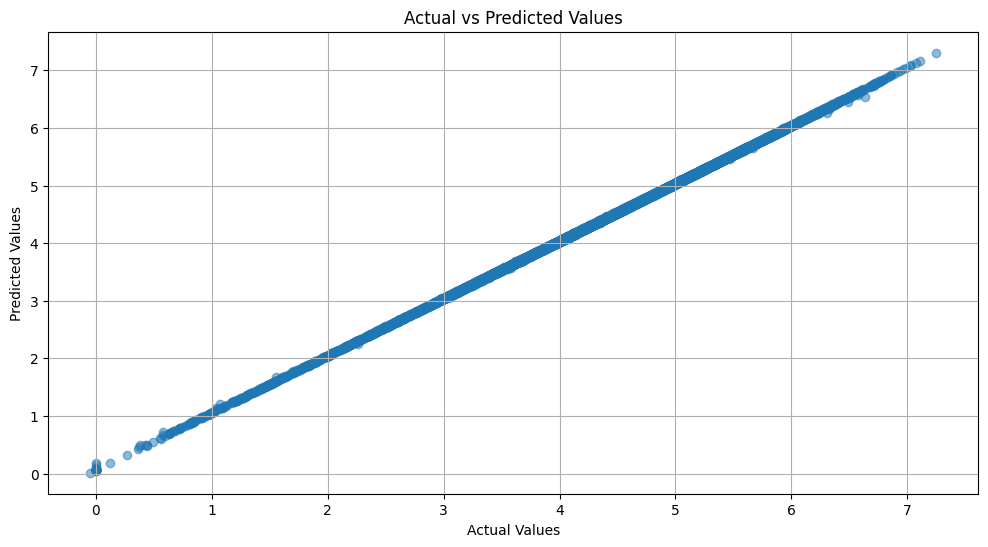

In [14]:
X = combined_features
y = df.loc[target_gene].T  # Transpose to have samples as rows and features as columns

# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and Training the Deep Neural Network (DNN) Model
model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),  # Input layer with the shape of the combined features
    layers.Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    layers.Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    layers.Dense(32, activation='relu'),   # Third hidden layer with 32 neurons
    layers.Dense(len(target_gene))        # Output layer for a single target gene
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Print the model summary
model.summary()

# Display the first few predictions
print("Predictions: ", predictions[:5])

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Print the calculated metrics
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

#### Cross-Validation

In [17]:
y = df.loc[target_gene].values.flatten()  # Ensure y is a 1D array

# Number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []
rmse_scores = []

# Cross-validation loop
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Building and Training the Deep Neural Network (DNN) Model
    model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),  # Input layer with the shape of the combined features
    layers.Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    layers.Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    layers.Dense(32, activation='relu'),   # Third hidden layer with 32 neurons
    layers.Dense(len(target_gene))        # Output layer for a single target gene
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    # Predict on the validation set
    predictions = model.predict(X_val).flatten()  # Ensure predictions are a 1D array
    
    # Calculate metrics
    mse = mean_squared_error(y_val, predictions)
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    rmse = np.sqrt(mse)
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

# Average the metrics across all folds
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)
avg_r2 = np.mean(r2_scores)
avg_rmse = np.mean(rmse_scores)

# Print average metrics
print(f'Average MSE: {avg_mse:.4f}')
print(f'Average MAE: {avg_mae:.4f}')
print(f'Average RMSE: {avg_rmse:.4f}')
print(f'Average R2: {avg_r2:.4f}')



461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
Average MSE: 0.0004
Average MAE: 0.0152
Average RMSE: 0.0166
Average R2: 0.9996


#### Deep Neural Network using combined features and multiple target genes

Epoch 1/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - loss: 1.5239 - mae: 0.8550 - val_loss: 0.4962 - val_mae: 0.5386
Epoch 2/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 339us/step - loss: 0.4657 - mae: 0.5191 - val_loss: 0.4373 - val_mae: 0.5008
Epoch 3/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 339us/step - loss: 0.4270 - mae: 0.4943 - val_loss: 0.4508 - val_mae: 0.5126
Epoch 4/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 338us/step - loss: 0.4168 - mae: 0.4876 - val_loss: 0.4253 - val_mae: 0.4947
Epoch 5/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - loss: 0.4103 - mae: 0.4828 - val_loss: 0.4258 - val_mae: 0.4966
Epoch 6/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 344us/step - loss: 0.4084 - mae: 0.4816 - val_loss: 0.4093 - val_mae: 0.4823
Epoch 7/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 339us/step - loss: 0.4085 - mae: 0.4814 - val_loss: 0.4066 - val_mae: 0.4802
Epoch 8/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - loss: 0.4061 - mae: 0.4797 - val_loss: 0.4096 - val_mae: 0.4836
Epoch 9/50
1841/1841 ━━━

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │        13,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 50)             │         1,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,512 (294.97 KB)

 Trainable params: 25,170 (98.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,342 (196.65 KB)

Predictions:  [[1.1181393  0.9398314  1.2730935  0.39643586 2.7931433  2.836925
  1.7719862  1.399711   1.296256   1.4880302  3.2254386  2.2269366
  3.0517282  1.6427059  0.7541283  2.4852433  0.41798896 0.79017836
  1.4736578  0.9270248  2.0200171  0.5053952  1.8158315  2.5430439
  0.4304248  2.039722   0.94242805 1.2849299  0.5965832  1.640734
  0.29117376 1.4556304  1.7398375  1.4454894  1.9651847  4.185591
  0.97761536 1.8667924  1.6863568  0.78635395 1.6168268  1.1345172
  1.1206768  0.46432275 0.62671924 0.45692807 0.9596468  1.1003445
  2.2953098  0.73661315]
 [1.2729162  1.4404719  1.4565604  2.94172    3.2647731  3.3552942
  2.4345753  1.9966726  2.3249602  3.3510137  3.6142921  1.7433345
  4.7057395  3.3620594  1.6922921  2.6006427  2.429575   2.5005503
  2.445053   3.0061932  2.3618345  0.73935753 2.257835   2.8306737
  1.2839402  2.0073934  1.8256826  2.6859612  0.21244174 2.1454337
  1.1157553  2.8705144  2.1114197  1.1555457  2.9252534  5.090646
  1.3297386  2.8981934  1.

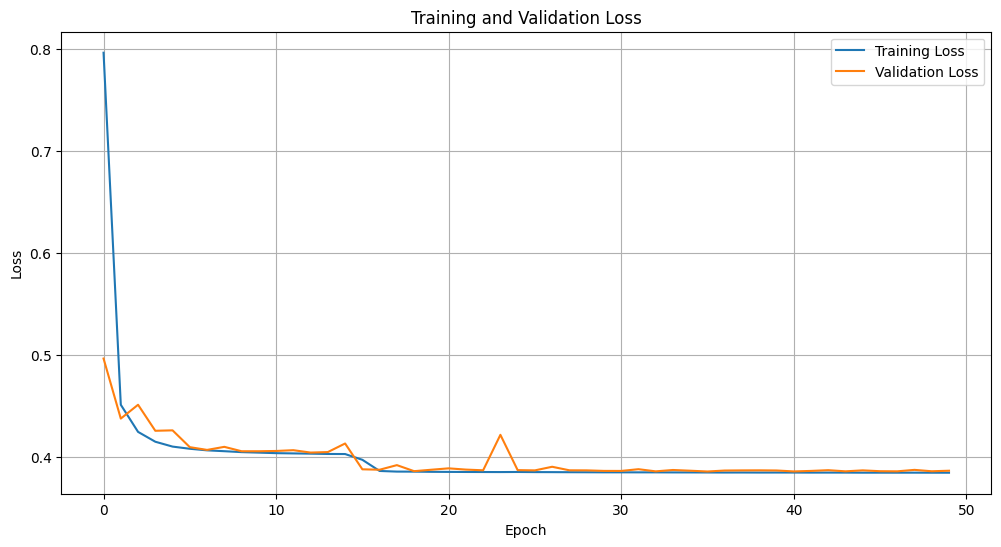

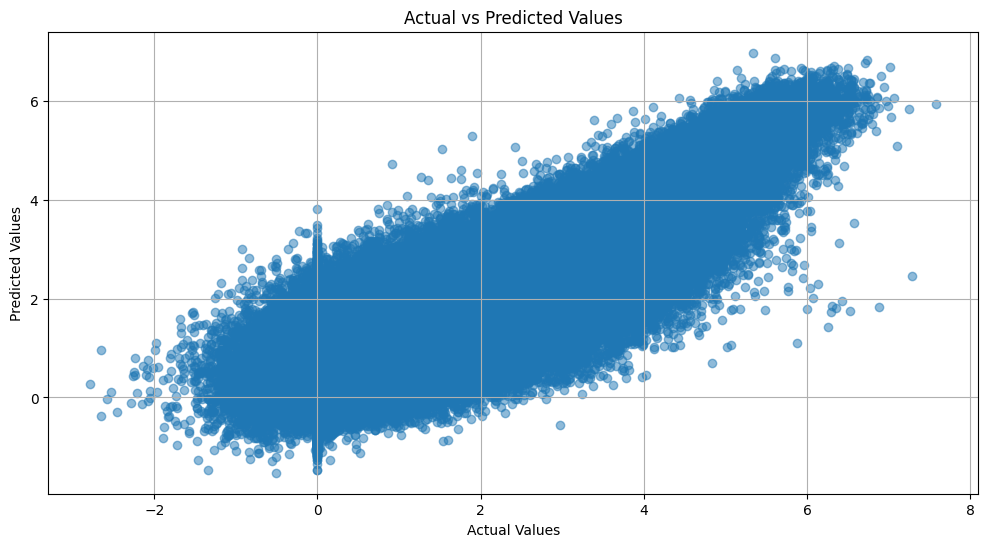

In [18]:
# Select the top 50 most variable genes based on variance across samples
df_var = df.var(axis=1).sort_values(ascending=False)
top_genes = df_var.index[:50]  # Select the top 50 most variable genes

# Create the feature matrix X and target matrix y
X = combined_features
y = df.loc[top_genes].T  # Transpose to have samples as rows and features as columns

# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and Training the Deep Neural Network (DNN) Model
model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),  # Input layer with the shape of the combined features
    layers.Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    layers.Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    layers.Dense(32, activation='relu'),   # Third hidden layer with 32 neurons
    layers.Dense(y_train.shape[1])         # Output layer for the number of target genes
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
predictions = model.predict(X_test)

# Convert y_test and predictions to NumPy arrays if they are DataFrames
y_test_np = y_test.to_numpy()
predictions_np = predictions

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Print the model summary
model.summary()

# Display the first few predictions
print("Predictions: ", predictions[:2])

# Calculate evaluation metrics for each gene
mse_per_gene = []
mae_per_gene = []
r2_per_gene = []

for i in range(y_test_np.shape[1]):
    mse = mean_squared_error(y_test_np[:, i], predictions_np[:, i])
    mae = mean_absolute_error(y_test_np[:, i], predictions_np[:, i])
    r2 = r2_score(y_test_np[:, i], predictions_np[:, i])
    
    mse_per_gene.append(mse)
    mae_per_gene.append(mae)
    r2_per_gene.append(r2)

# Aggregate metrics
mean_mse = np.mean(mse_per_gene)
mean_mae = np.mean(mae_per_gene)
mean_r2 = np.mean(r2_per_gene)
mean_rmse = np.sqrt(mean_mse)

# Print the calculated metrics
print(f'MAE (Mean): {mean_mae:.4f}')
print(f'RMSE (Mean): {mean_rmse:.4f}')
print(f'MSE (Mean): {mean_mse:.4f}')
print(f'R2 (Mean): {mean_r2:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


#### Cross-Validation

In [19]:
# Select the top 50 most variable genes based on variance across samples
df_var = df.var(axis=1).sort_values(ascending=False)
top_genes = df_var.index[:50]  # Select the top 50 most variable genes

# Create the feature matrix X and target matrix y
X = combined_features
y = df.loc[top_genes].T  # Transpose to have samples as rows and features as columns

# Flatten X for Dense network (if not already flattened)
X = X.reshape((X.shape[0], X.shape[1]))  # Shape (samples, features)

# Initialize cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []
rmse_scores = []

# Cross-validation loop
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]  # Ensure y is sliced correctly
    
    # Define and compile the model
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),  # Input layer with the shape of the features
        layers.Dense(128, activation='relu'),  # First hidden layer with 128 neurons
        layers.Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
        layers.Dense(32, activation='relu'),   # Third hidden layer with 32 neurons
        layers.Dense(y_train.shape[1])         # Output layer for the number of target genes
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    # Predict on the validation set
    predictions = model.predict(X_val)
    
    y_val_np = y_val.to_numpy()
    predictions_np = predictions
    
    # Calculate metrics for each gene
    mse_per_gene = []
    mae_per_gene = []
    r2_per_gene = []

    for i in range(y_val_np.shape[1]):
        mse = mean_squared_error(y_val_np[:, i], predictions_np[:, i])
        mae = mean_absolute_error(y_val_np[:, i], predictions_np[:, i])
        r2 = r2_score(y_val_np[:, i], predictions_np[:, i])
        
        mse_per_gene.append(mse)
        mae_per_gene.append(mae)
        r2_per_gene.append(r2)

    # Aggregate metrics
    mean_mse = np.mean(mse_per_gene)
    mean_mae = np.mean(mae_per_gene)
    mean_r2 = np.mean(r2_per_gene)
    mean_rmse = np.sqrt(mean_mse)
    
    mse_scores.append(mean_mse)
    mae_scores.append(mean_mae)
    r2_scores.append(mean_r2)
    rmse_scores.append(mean_rmse)

# Print average metrics across all folds
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)
avg_r2 = np.mean(r2_scores)
avg_rmse = np.mean(rmse_scores)

print(f'Average MAE: {avg_mae:.4f}')
print(f'Average RMSE: {avg_rmse:.4f}')
print(f'Average MSE: {avg_mse:.4f}')
print(f'Average R2: {avg_r2:.4f}')


461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
Average MAE: 0.4262
Average RMSE: 0.5691
Average MSE: 0.3244
Average R2: 0.6782


#### LSTM using combined features and single target gene

Epoch 1/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - loss: 0.7803 - mae: 0.5507 - val_loss: 0.0711 - val_mae: 0.2053
Epoch 2/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - loss: 0.0467 - mae: 0.1636 - val_loss: 0.0075 - val_mae: 0.0691
Epoch 3/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - loss: 0.0043 - mae: 0.0491 - val_loss: 0.0056 - val_mae: 0.0621
Epoch 4/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - loss: 0.0023 - mae: 0.0367 - val_loss: 0.0068 - val_mae: 0.0744
Epoch 5/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - loss: 0.0023 - mae: 0.0358 - val_loss: 0.0111 - val_mae: 0.0977
Epoch 6/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - loss: 0.0018 - mae: 0.0306 - val_loss: 0.0032 - val_mae: 0.0493
Epoch 7/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - loss: 0.0014 - mae: 0.0280 - val_loss: 4.3951e-04 - val_mae: 0.0158
Epoch 8/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - loss: 0.0011 - mae: 0.0247 - val_loss: 0.0033 - val_mae: 0.0500
Epoch 9/50
1841/1841

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       118,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 379,781 (1.45 MB)

 Trainable params: 126,593 (494.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 253,188 (989.02 KB)

MAE: 0.0552
RMSE: 0.0570
MSE: 0.0032
R2: 0.9965


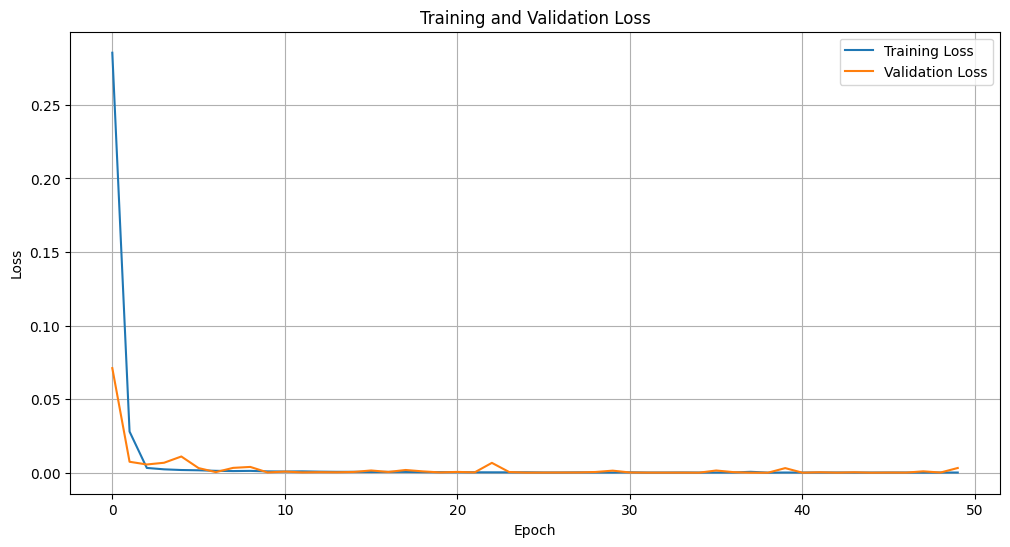

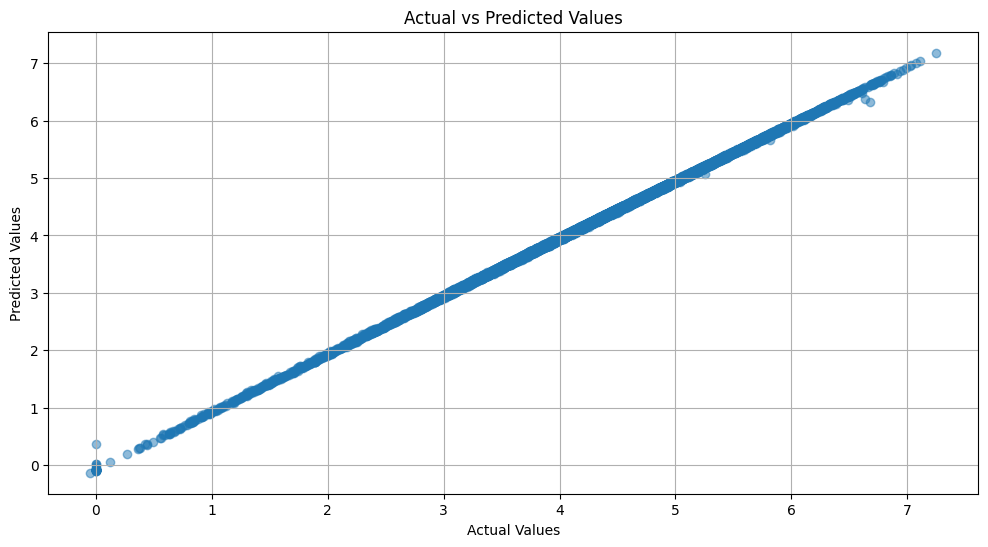

In [21]:
X = combined_features  # combined features 
y = df.loc[target_gene].T  

# Reshape X for LSTM layer input: LSTM expects input in the format (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Perform train-test split to separate data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building an RNN model with LSTM layers
# The model consists of an LSTM layer followed by two Dense layers
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Define the input shape explicitly
    layers.LSTM(128, activation='relu'),  # LSTM layer with 128 units and ReLU activation
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    layers.Dense(len(target_gene))  # Output layer: one neuron per target gene
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Predict gene expression on the test set
predictions = model.predict(X_test)

# Print the model summary
model.summary()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Print the calculated metrics
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

#### Cross Validation

Fold 1/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
Fold 1 - MAE: 0.0088, RMSE: 0.0103, MSE: 0.0001, R2: 0.9999


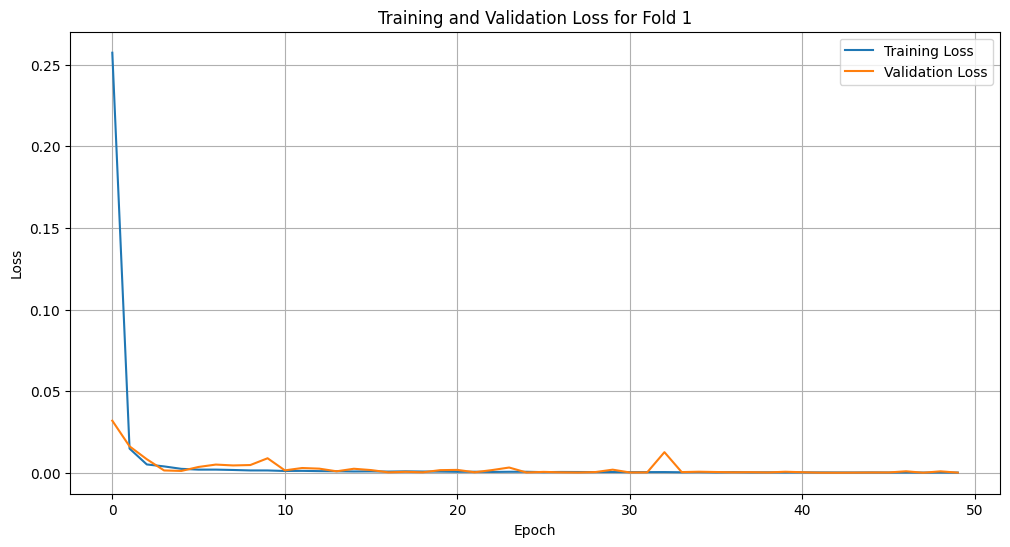

Fold 2/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
Fold 2 - MAE: 0.0141, RMSE: 0.0192, MSE: 0.0004, R2: 0.9996


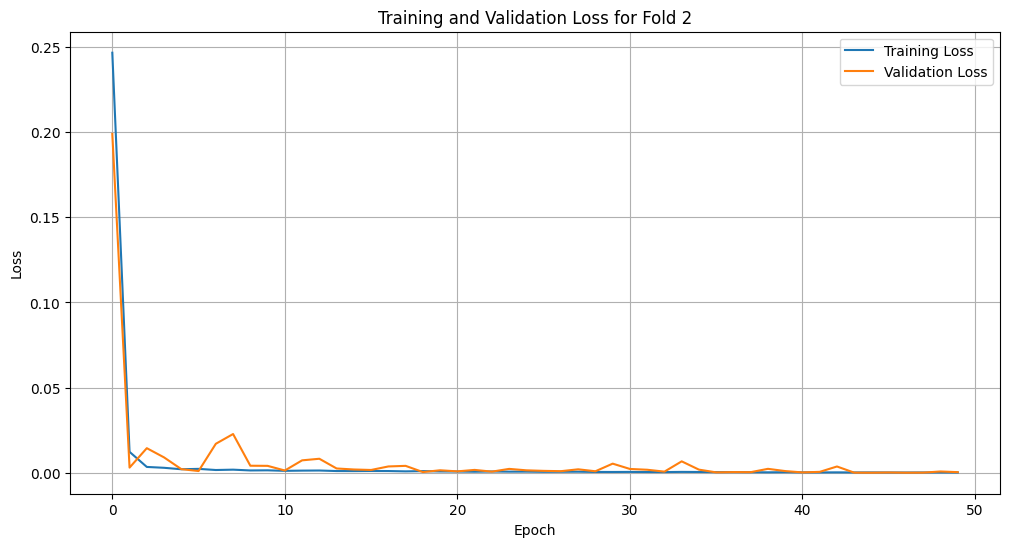

Fold 3/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step
Fold 3 - MAE: 0.0076, RMSE: 0.0089, MSE: 0.0001, R2: 0.9999


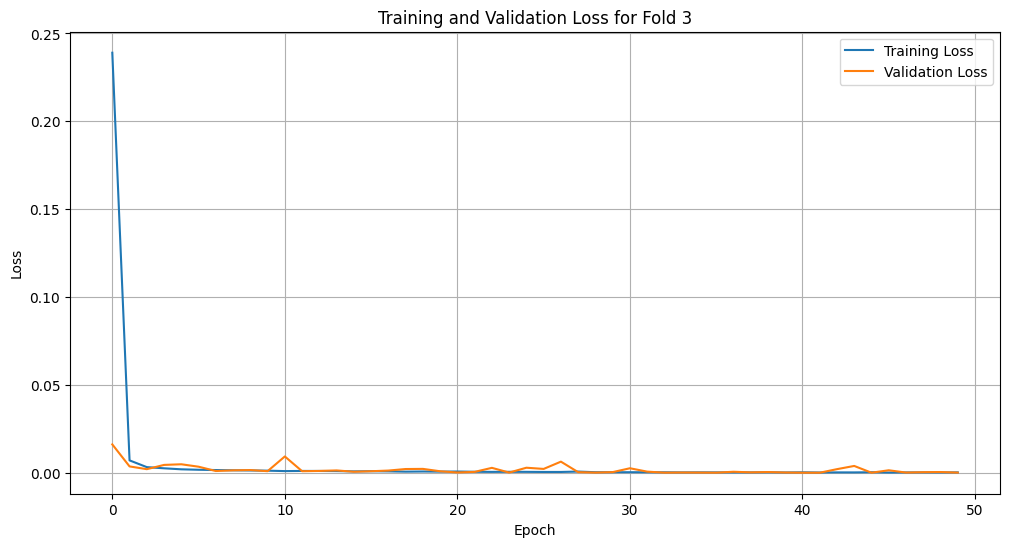

Fold 4/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
Fold 4 - MAE: 0.0067, RMSE: 0.0075, MSE: 0.0001, R2: 0.9999


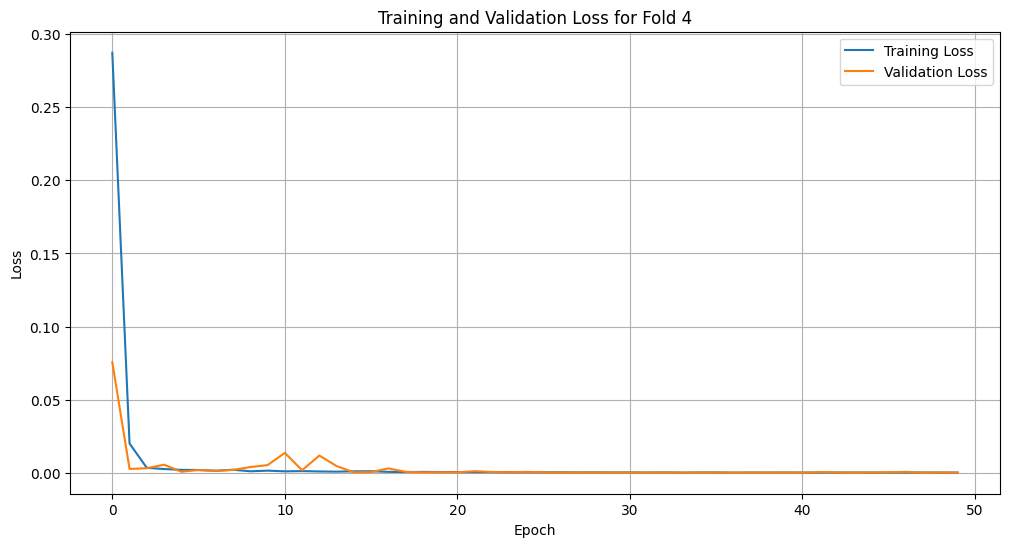

Fold 5/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
Fold 5 - MAE: 0.0020, RMSE: 0.0075, MSE: 0.0001, R2: 0.9999


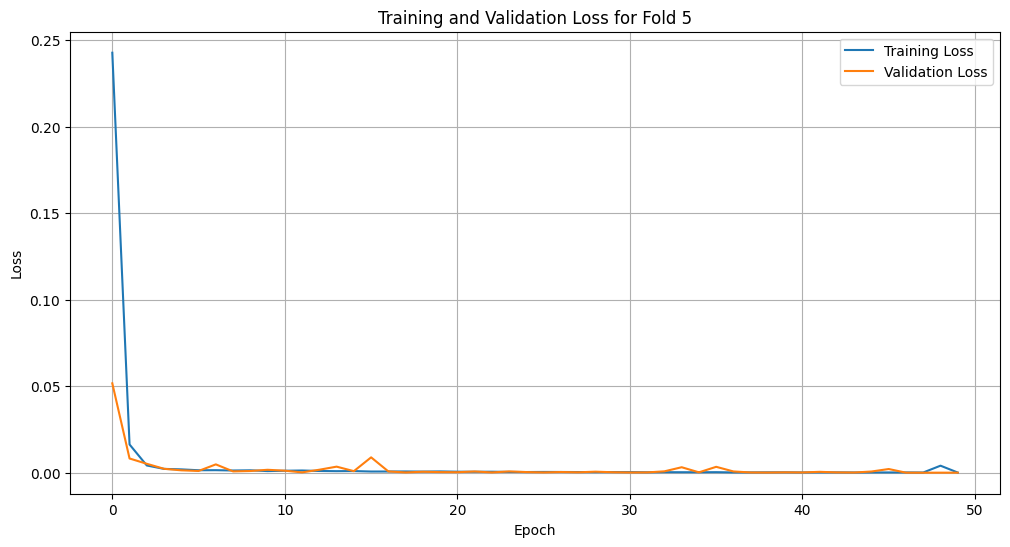


Average MAE: 0.0078
Average RMSE: 0.0107
Average MSE: 0.0001
Average R2: 0.9999


In [23]:
y = df.loc[target_gene].T.values

# Number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store metrics for each fold
mae_list = []
rmse_list = []
mse_list = []
r2_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}/{k}")
    
    # Split the data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Building the LSTM model
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Define the input shape explicitly
        layers.LSTM(128, activation='relu'),  # LSTM layer with 128 units and ReLU activation
        layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
        layers.Dense(y_train.shape[1])  # Output layer: one neuron per target gene (should match y's second dimension)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Predict on the validation set
    predictions = model.predict(X_val)

    # Calculate metrics
    mse = mean_squared_error(y_val, predictions)
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    rmse = np.sqrt(mse)

    # Store metrics
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    rmse_list.append(rmse)

    # Print metrics for this fold
    print(f'Fold {fold+1} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}')
    
    # Plot Training and Validation Loss for this fold
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss for Fold {fold+1}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate average metrics across all folds
avg_mse = np.mean(mse_list)
avg_mae = np.mean(mae_list)
avg_r2 = np.mean(r2_list)
avg_rmse = np.mean(rmse_list)

# Print the average metrics
print(f'\nAverage MAE: {avg_mae:.4f}')
print(f'Average RMSE: {avg_rmse:.4f}')
print(f'Average MSE: {avg_mse:.4f}')
print(f'Average R2: {avg_r2:.4f}')




#### LSTM using combined features and multiple target genes

Epoch 1/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - loss: 0.8648 - mae: 0.6639 - val_loss: 0.1709 - val_mae: 0.3125
Epoch 2/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 0.1490 - mae: 0.2863 - val_loss: 0.1298 - val_mae: 0.2590
Epoch 3/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - loss: 0.1265 - mae: 0.2532 - val_loss: 0.1275 - val_mae: 0.2522
Epoch 4/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - loss: 0.1216 - mae: 0.2419 - val_loss: 0.1266 - val_mae: 0.2487
Epoch 5/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 0.1184 - mae: 0.2349 - val_loss: 0.1244 - val_mae: 0.2429
Epoch 6/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 0.1178 - mae: 0.2316 - val_loss: 0.2560 - val_mae: 0.3838
Epoch 7/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 0.1217 - mae: 0.2357 - val_loss: 0.1191 - val_mae: 0.2327
Epoch 8/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - loss: 0.1166 - mae: 0.2282 - val_loss: 0.1206 - val_mae: 0.2335
Epoch 9/50
1841/1841 ━━━

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 128)            │       118,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,336 (1.49 MB)

 Trainable params: 129,778 (506.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 259,558 (1013.90 KB)

Predictions:  [[ 1.5810754   1.2450788   0.9828442   0.35146895  2.988016    2.7872472
   1.1441557   1.4967067   1.2585732   1.7928853   3.1211019   2.029561
   3.2318091   1.5393021   0.6713334   2.511938    0.3656745   0.6380961
   1.6896123   1.0689068   1.931967   -0.28414872  2.278595    3.241286
   1.1070248   1.4859451   0.5212264   1.3698835   1.6182938   1.2883418
   0.06461759  1.9202766   1.1798885   1.5770528   2.1827636   4.168995
   1.4094486   1.7964861   2.2199304   1.1081908   1.6975292   1.096638
   1.0161651   1.098616    0.3775078   0.7687529   0.7490944  -0.1000064
   3.1547399   0.53960884]
 [ 1.3446022   1.6509519   1.0288996   2.8584077   3.0698147   3.2665858
   1.9243255   2.0595074   2.3037744   3.6072102   3.7319012   1.9617264
   4.9079933   3.3721733   1.0560329   2.794256    2.22717     2.4307516
   2.444577    3.4683492   2.8411245   0.4436679   3.1884208   2.40704
   0.61962974  2.1029582   2.0562387   2.6695037   0.3401385   2.132027
   0.9799574   3.

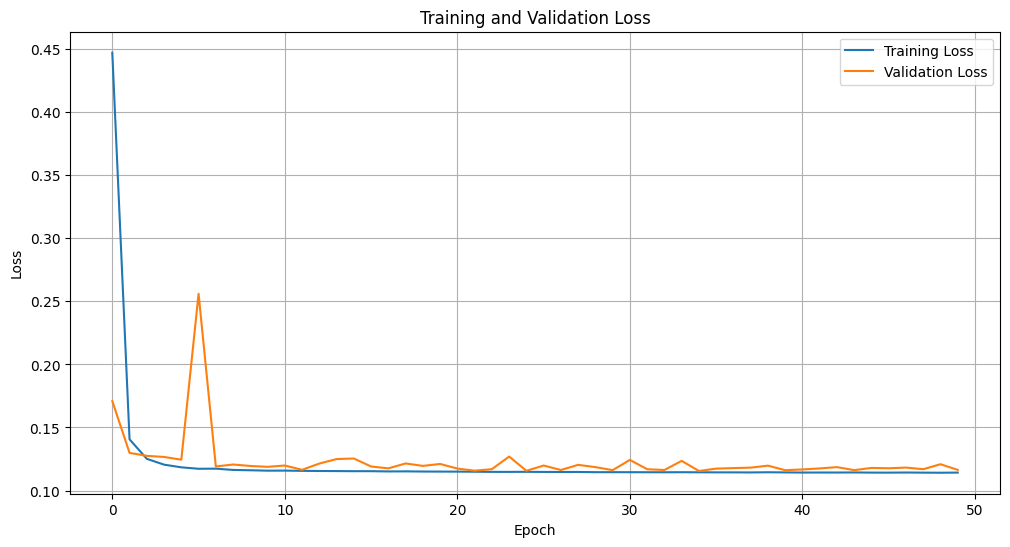

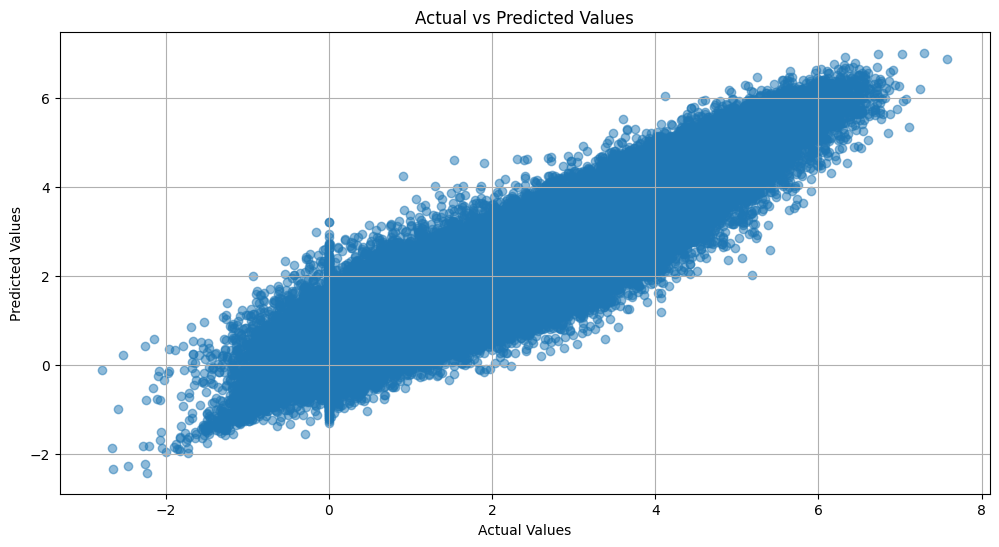

In [24]:
# Select the top 50 most variable genes based on variance across samples
df_var = df.var(axis=1).sort_values(ascending=False)
top_genes = df_var.index[:50]  # Select the top 50 most variable genes

# Use the combined data as features (X)
X = combined_features  

# Select the expression levels of the top genes as the target (y)
y = df.loc[top_genes].T  # Transpose to have samples as rows and genes as columns

"""Reshape X for LSTM layer input: LSTM expects input in the format (samples, timesteps, features)
 Since this is not time-series data, we'll use 1 timestep and all combined components as features"""
X = X.reshape((X.shape[0], 1, X.shape[1]))

#Perform train-test split to separate data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building an RNN model with LSTM layers
# The model consists of an LSTM layer followed by two Dense layers
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Define the input shape explicitly
    layers.LSTM(128, activation='relu'),  # LSTM layer with 128 units and ReLU activation
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    layers.Dense(len(top_genes))  # Output layer: one neuron per target gene
])

# Compile the model with Adam optimizer and MSE loss function
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model on the training data and validate on the test data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set to determine its performance
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Predict gene expression on the test set
predictions = model.predict(X_test)

# Print the model summary to display its architecture
model.summary()

# Display the first few predictions for inspection
print("Predictions: ", predictions[:2])

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Print the calculated metrics
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

#### Model Enhancement using attention mechanism

In [40]:
from tensorflow.keras.layers import Layer
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal',
                                 trainable=True)
        self.u = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # Score computation
        u_it = tf.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a_it = tf.nn.softmax(tf.tensordot(u_it, self.u, axes=1), axis=1)
        return tf.reduce_sum(a_it * x, axis=1)


Epoch 1/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - loss: 0.7822 - mae: 0.6187 - val_loss: 0.1105 - val_mae: 0.2502
Epoch 2/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - loss: 0.0814 - mae: 0.2104 - val_loss: 0.0496 - val_mae: 0.1605
Epoch 3/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - loss: 0.0424 - mae: 0.1438 - val_loss: 0.0491 - val_mae: 0.1616
Epoch 4/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - loss: 0.0350 - mae: 0.1254 - val_loss: 0.0376 - val_mae: 0.1333
Epoch 5/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - loss: 0.0316 - mae: 0.1159 - val_loss: 0.0355 - val_mae: 0.1272
Epoch 6/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - loss: 0.0298 - mae: 0.1104 - val_loss: 0.0308 - val_mae: 0.1142
Epoch 7/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - loss: 0.0291 - mae: 0.1081 - val_loss: 0.0407 - val_mae: 0.1436
Epoch 8/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - loss: 0.0287 - mae: 0.1074 - val_loss: 0.0336 - val_mae: 0.1256
Epoch 9/50
1841/1841 ━━━

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 1, 128)         │       118,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 439,256 (1.68 MB)

 Trainable params: 146,418 (571.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 292,838 (1.12 MB)

Predictions:  [[ 1.778963    1.1211779   1.0858326   0.30508912  3.2087722   2.9718647
   1.1101016   1.6254076   1.241014    1.9445449   3.0658598   2.1209202
   3.226043    1.1924939   0.74039406  2.4749556   0.32328972  0.5487145
   1.9872606   0.7653157   1.9092686  -0.3303874   2.264129    3.0370739
   1.2604074   1.63466     0.72835314  1.1446515   1.4675906   1.4129326
   0.27063972  2.3022122   0.7572318   1.7098454   2.305058    3.9909275
   1.3457274   1.8019959   2.1521065   1.0561758   1.6190491   1.2629694
   1.1612599   1.1328237   0.25708526  0.5780101   0.90662044 -0.02288454
   3.1059847   0.4340928 ]
 [ 1.4275038   1.3982248   0.90037197  3.0066485   2.8707922   3.5621457
   1.5412421   2.0052953   2.3987246   3.5552888   3.4018245   2.231838
   4.8053803   3.2843719   1.0737028   2.7245493   2.347742    2.6383767
   2.9057465   3.3103545   2.7828333   0.34384304  3.2816072   2.6184578
   0.5319835   2.2320046   2.0314567   2.5324988   0.26940292  2.545924
   1.792743

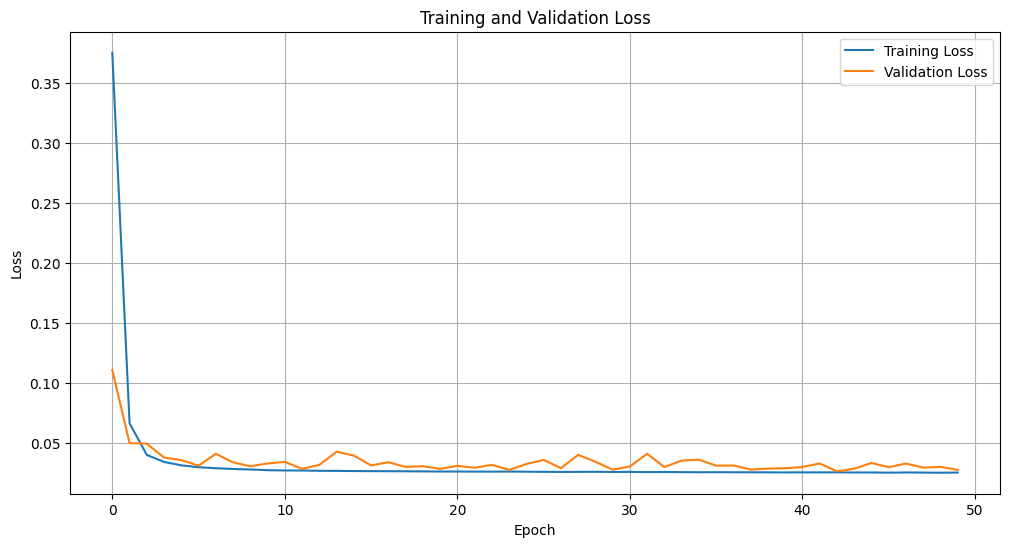

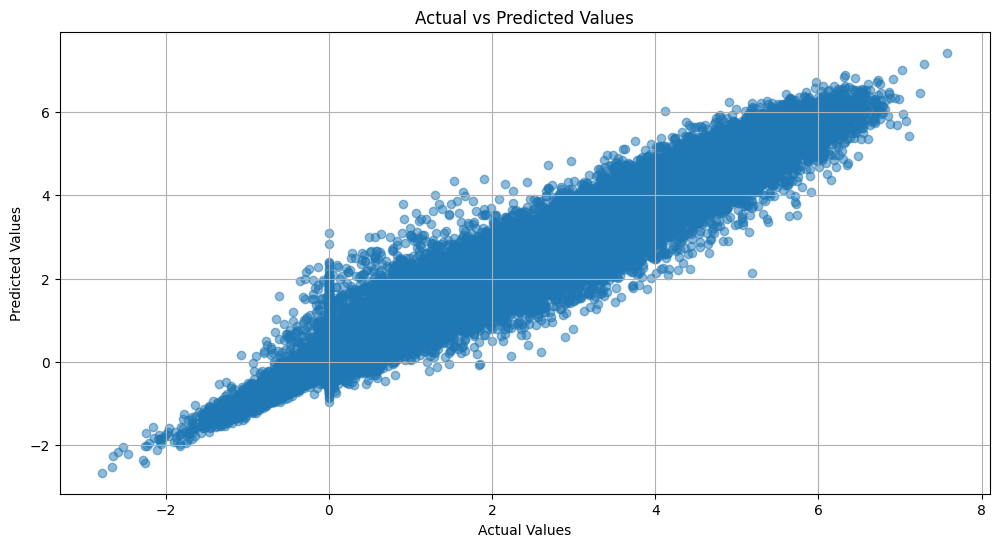

In [41]:
# Building an RNN model with LSTM and Attention layers
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Define the input shape explicitly
    layers.LSTM(128, return_sequences=True),  # LSTM layer with 128 units and return sequences
    Attention(),  # Attention layer
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    layers.Dense(len(top_genes))  # Output layer: one neuron per target gene
])

# Compile the model with Adam optimizer and MSE loss function
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model on the training data and validate on the test data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set to determine its performance
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Predict gene expression on the test set
predictions = model.predict(X_test)

# Print the model summary to display its architecture
model.summary()

# Display the first few predictions for inspection
print("Predictions: ", predictions[:2])

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Print the calculated metrics
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


#### Cross Validation

In [61]:
df_var = df.var(axis=1).sort_values(ascending=False)
top_genes = df_var.index[:50]  # Select the top 50 most variable genes

# Use the combined data as features (X)
X = combined_features  

# Select the expression levels of the top genes as the target (y)
y = df.loc[top_genes].T  # Transpose to have samples as rows and genes as columns

# Convert the data to numpy arrays for easier handling
X_np = X
y_np = y.values  

# Set up K-Fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store metrics for each fold
mse_list = []
mae_list = []
r2_list = []

# Perform K-Fold cross-validation
for train_index, val_index in kf.split(X_np):
    # Split the data into training and validation sets
    X_train, X_val = X_np[train_index], X_np[val_index]
    y_train, y_val = y_np[train_index], y_np[val_index]
    
    # Reshape X for LSTM input: (samples, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
    
    # Build the model
    model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Define the input shape explicitly
    layers.LSTM(128, return_sequences=True),  # LSTM layer with 128 units and return sequences
    Attention(),  # Attention layer
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    layers.Dense(len(top_genes))  # Output layer: one neuron per target gene
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    # Predict on the validation set
    predictions = model.predict(X_val)
# Calculate metrics
    mse = mean_squared_error(y_val, predictions)
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    rmse = np.sqrt(mse)
    
    # Store metrics
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    rmse_list.append(rmse)
    
    print(f"Fold {fold+1} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


# Calculate average metrics across all folds
avg_mse = np.mean(mse_list)
avg_mae = np.mean(mae_list)
avg_r2 = np.mean(r2_list)
avg_rmse = np.sqrt(avg_mse)

# Print the average metrics
print(f'Average MAE: {avg_mae:.4f}')
print(f'Average RMSE: {avg_rmse:.4f}')
print(f'Average MSE: {avg_mse:.4f}')
print(f'Average R2: {avg_r2:.4f}')



461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
Fold 5 - MSE: 0.0126, MAE: 0.0838, RMSE: 0.1123, R2: 0.9882
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
Fold 5 - MSE: 0.0222, MAE: 0.1051, RMSE: 0.1490, R2: 0.9798
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
Fold 5 - MSE: 0.0063, MAE: 0.0608, RMSE: 0.0795, R2: 0.9939
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
Fold 5 - MSE: 0.0103, MAE: 0.0714, RMSE: 0.1017, R2: 0.9903
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
Fold 5 - MSE: 0.0066, MAE: 0.0639, RMSE: 0.0810, R2: 0.9937
Average MAE: 0.0770
Average RMSE: 0.1077
Average MSE: 0.0116
Average R2: 0.9892


#### GRU for single target gene

Epoch 1/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - loss: 1.0328 - mae: 0.6187 - val_loss: 0.0857 - val_mae: 0.2258
Epoch 2/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - loss: 0.0646 - mae: 0.1982 - val_loss: 0.0172 - val_mae: 0.1039
Epoch 3/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 0.0109 - mae: 0.0794 - val_loss: 0.0039 - val_mae: 0.0497
Epoch 4/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step - loss: 0.0021 - mae: 0.0353 - val_loss: 0.0027 - val_mae: 0.0418
Epoch 5/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - loss: 0.0020 - mae: 0.0324 - val_loss: 5.5707e-04 - val_mae: 0.0183
Epoch 6/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - loss: 0.0019 - mae: 0.0326 - val_loss: 5.6167e-04 - val_mae: 0.0187
Epoch 7/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 0.0016 - mae: 0.0283 - val_loss: 0.0025 - val_mae: 0.0433
Epoch 8/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - loss: 0.0017 - mae: 0.0304 - val_loss: 1.9898e-04 - val_mae: 0.0105
Epoch 9/50
1

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 128)            │        89,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,229 (1.11 MB)

 Trainable params: 97,409 (380.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 194,820 (761.02 KB)

MAE: 0.0039
RMSE: 0.0071
MSE: 0.0000
R2: 0.9999


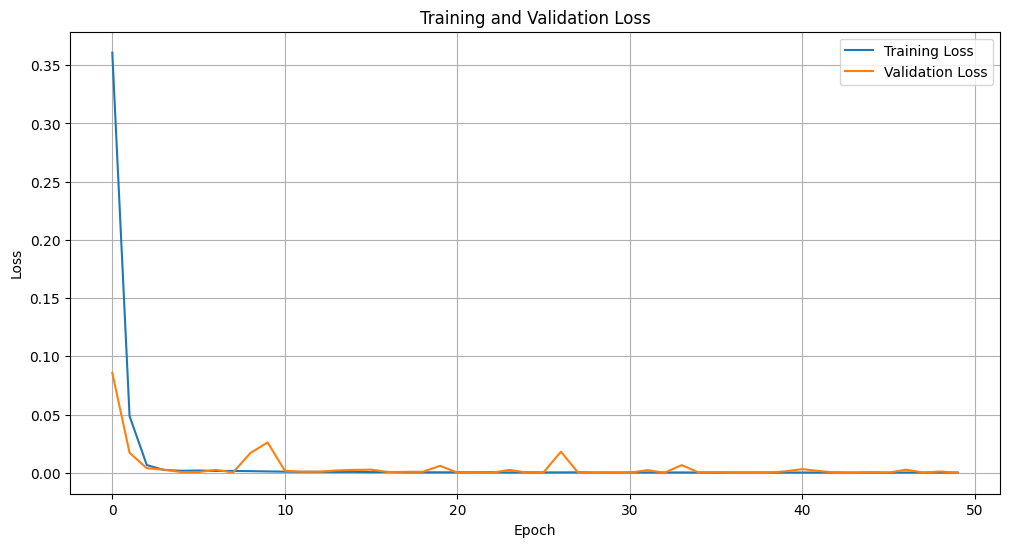

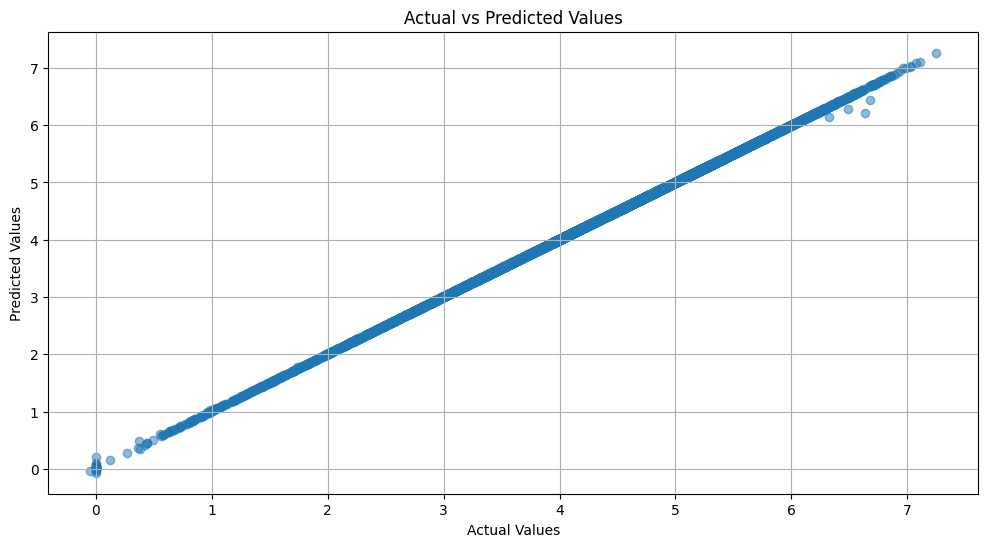

In [31]:
# Use the combined data as features (X)
X = combined_features  

# Select the expression levels of the single target gene as the target (y)
y = df.loc[target_gene].T  # Transpose to have samples as rows and the target gene as a column

# Reshape X for GRU layer input
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Perform train-test split to separate data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building an RNN model with GRU layers
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Define the input shape explicitly
    layers.GRU(128, activation='relu'),  
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    layers.Dense(1)  # Output layer: one neuron for the single target gene
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Predict gene expression on the test set
predictions = model.predict(X_test).flatten()  # Flatten predictions to match the shape of y_test

# Print the model summary
model.summary()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Print the calculated metrics
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


#### Cross-Validation

In [32]:
# Use the combined data as features (X)
X = combined_features  

# Select the expression levels of the single target gene as the target (y)
y = df.loc[target_gene].T.values  # Convert to a numpy array

# Reshape X for GRU layer input
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialize K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store metrics
mse_scores = []
mae_scores = []
r2_scores = []
rmse_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}/{k}")
    
    # Split data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Build the model
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
        layers.GRU(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Single output neuron
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Predict on validation data
    predictions = model.predict(X_val).flatten()
    
    # Calculate metrics
    mse = mean_squared_error(y_val, predictions)
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    rmse = np.sqrt(mse)
    
    # Store metrics
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    
    print(f"Fold {fold+1} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Compute average metrics
print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R2: {np.mean(r2_scores):.4f}")


Fold 1/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
Fold 1 - MSE: 0.0002, MAE: 0.0111, RMSE: 0.0131, R2: 0.9998
Fold 2/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
Fold 2 - MSE: 0.0001, MAE: 0.0072, RMSE: 0.0094, R2: 0.9999
Fold 3/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
Fold 3 - MSE: 0.0000, MAE: 0.0026, RMSE: 0.0057, R2: 1.0000
Fold 4/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step
Fold 4 - MSE: 0.0004, MAE: 0.0184, RMSE: 0.0200, R2: 0.9996
Fold 5/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
Fold 5 - MSE: 0.0001, MAE: 0.0099, RMSE: 0.0122, R2: 0.9998

Average MSE: 0.0002
Average MAE: 0.0098
Average RMSE: 0.0121
Average R2: 0.9998


#### GRU for multiples target genes

Epoch 1/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - loss: 0.9918 - mae: 0.7036 - val_loss: 0.2502 - val_mae: 0.3835
Epoch 2/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - loss: 0.2198 - mae: 0.3552 - val_loss: 0.1901 - val_mae: 0.3231
Epoch 3/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - loss: 0.1816 - mae: 0.3134 - val_loss: 0.1725 - val_mae: 0.3003
Epoch 4/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - loss: 0.1670 - mae: 0.2927 - val_loss: 0.1764 - val_mae: 0.3016
Epoch 5/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 0.1644 - mae: 0.2874 - val_loss: 0.1651 - val_mae: 0.2868
Epoch 6/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - loss: 0.1630 - mae: 0.2848 - val_loss: 0.1801 - val_mae: 0.3059
Epoch 7/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - loss: 0.1639 - mae: 0.2850 - val_loss: 0.1645 - val_mae: 0.2854
Epoch 8/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - loss: 0.1620 - mae: 0.2828 - val_loss: 0.2139 - val_mae: 0.3464
Epoch 9/50
1841/1841 ━━━

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_7 (GRU)                     │ (None, 128)            │        89,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,784 (1.15 MB)

 Trainable params: 100,594 (392.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 201,190 (785.90 KB)

Predictions:  [[ 1.6146463   1.3809384   0.9298037   0.47191423  3.052475    2.8006377
   1.2429419   1.4372269   1.3732969   1.5367302   3.0660467   2.0099902
   3.2048185   1.5280104   0.4975564   2.3994079   0.6153269   0.71857923
   1.840275    0.8540419   1.786435   -0.3898496   2.1044674   2.6671066
   1.2557364   1.6996651   0.3412413   1.3485464   1.6597501   1.6055999
   0.14143342  1.7560773   1.3626417   1.6519388   2.2155318   4.268259
   0.8653381   1.9043466   2.1854095   1.2671254   1.5689278   1.0122309
   1.074169    0.7965923   0.7231127   0.7514753   0.79131824  0.12819695
   3.2642946   0.40221494]
 [ 1.3728455   1.5105134   0.9308183   2.9649      2.9839277   3.245706
   2.4079025   2.015695    2.1426606   3.3161173   3.6810846   1.9641522
   4.932478    3.3426533   1.0870756   2.5388873   2.4106576   2.477561
   2.5242796   3.088288    2.782277    0.39998674  3.0377576   2.4169114
   1.3082595   2.576362    1.694932    2.7045078   0.36093497  2.0973094
   0.974752

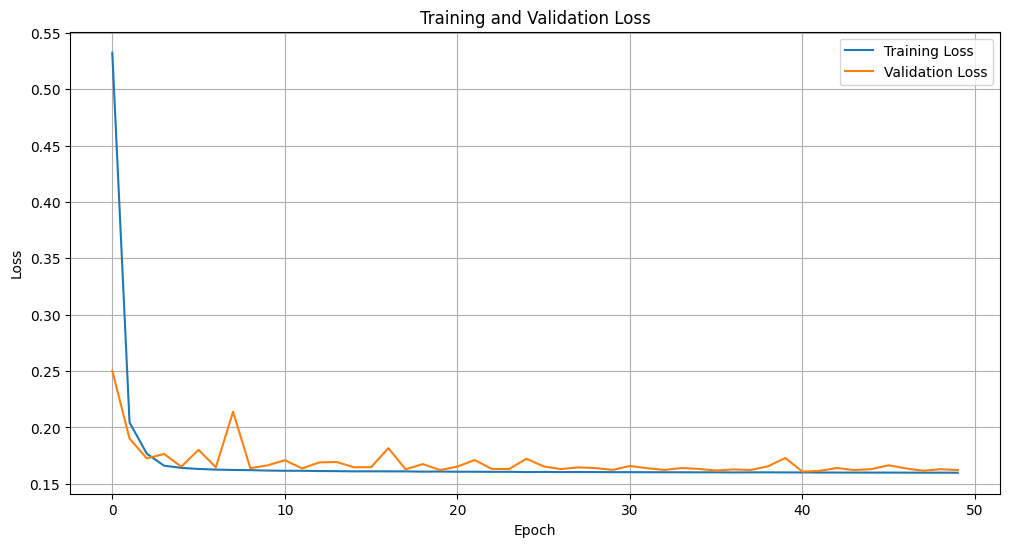

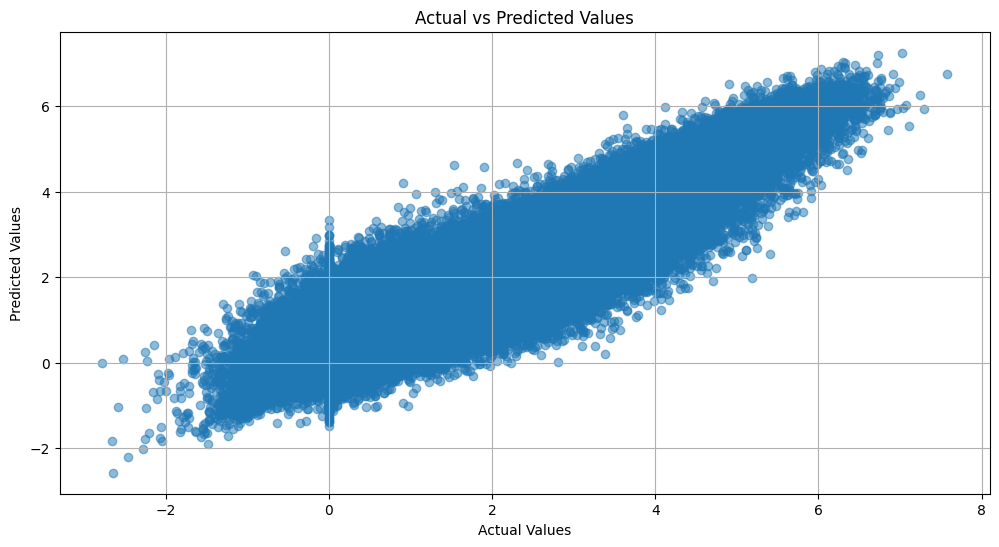

In [33]:
# Select the top 50 most variable genes based on variance across samples
df_var = df.var(axis=1).sort_values(ascending=False)
top_genes = df_var.index[:50]  # Select the top 50 most variable genes

# Use the combined data as features (X)
X = combined_features  

# Select the expression levels of the top genes as the target (y)
y = df.loc[top_genes].T  # Transpose to have samples as rows and genes as columns

X = X.reshape((X.shape[0], 1, X.shape[1]))

#Perform train-test split to separate data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building an RNN model with GRU layers
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Define the input shape explicitly
    layers.GRU(128, activation='relu'),  # GRU layer
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    layers.Dense(len(top_genes))  # Output layer: one neuron per target gene
])

# Compile the model with Adam optimizer and MSE loss function
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model on the training data and validate on the test data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set to determine its performance
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Predict gene expression on the test set
predictions = model.predict(X_test)

# Print the model summary to display its architecture
model.summary()

# Display the first few predictions for inspection
print("Predictions: ", predictions[:2])

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Print the calculated metrics
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

#### Model Enhancement

In [52]:
from tensorflow.keras.layers import Layer
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal',
                                 trainable=True)
        self.u = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # Score computation
        u_it = tf.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a_it = tf.nn.softmax(tf.tensordot(u_it, self.u, axes=1), axis=1)
        return tf.reduce_sum(a_it * x, axis=1)

Epoch 1/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - loss: 0.9658 - mae: 0.6945 - val_loss: 0.2213 - val_mae: 0.3601
Epoch 2/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - loss: 0.1872 - mae: 0.3246 - val_loss: 0.1682 - val_mae: 0.3011
Epoch 3/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - loss: 0.1640 - mae: 0.2944 - val_loss: 0.1682 - val_mae: 0.2992
Epoch 4/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 844us/step - loss: 0.1581 - mae: 0.2838 - val_loss: 0.1563 - val_mae: 0.2798
Epoch 5/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - loss: 0.1557 - mae: 0.2782 - val_loss: 0.1567 - val_mae: 0.2805
Epoch 6/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - loss: 0.1540 - mae: 0.2752 - val_loss: 0.1580 - val_mae: 0.2813
Epoch 7/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - loss: 0.1535 - mae: 0.2739 - val_loss: 0.1533 - val_mae: 0.2728
Epoch 8/50
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - loss: 0.1524 - mae: 0.2721 - val_loss: 0.1574 - val_mae: 0.2786
Epoch 9/50
1841/1841 ━━━

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_18 (GRU)                    │ (None, 1, 128)         │        89,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_7 (Attention)         │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351,704 (1.34 MB)

 Trainable params: 117,234 (457.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 234,470 (915.90 KB)

Predictions:  [[ 1.6219772   1.3317297   0.9112154   0.42582485  3.0506954   2.9175942
   1.2764769   1.382681    1.3023148   1.6222697   2.9366467   2.125051
   3.2384944   1.5850402   0.6504678   2.487623    0.47129765  0.7730394
   1.8204514   0.8984303   1.8457328  -0.3379839   2.1338203   2.6535778
   1.1859896   1.7225231   0.40449545  1.3857137   1.5789611   1.6479368
   0.09111521  1.8913429   1.3626252   1.6322551   2.291425    4.185709
   0.9836566   1.8187389   2.2217715   1.1852968   1.6179625   1.0100496
   1.1185026   1.1669322   0.5677673   0.8066415   0.79493105  0.11225855
   3.2066853   0.57046735]
 [ 1.3729255   1.3662515   0.95782506  2.9440475   2.997602    3.3362947
   2.3290446   1.9616004   2.2560368   3.4929848   3.532098    2.0480227
   4.9069824   3.4343693   1.0796936   2.7253416   2.4167812   2.5747797
   2.4847617   3.0898683   2.735157    0.4326043   3.1300135   2.547092
   1.2746962   2.5739517   1.7978642   2.718295    0.29140246  2.0293894
   0.8570341

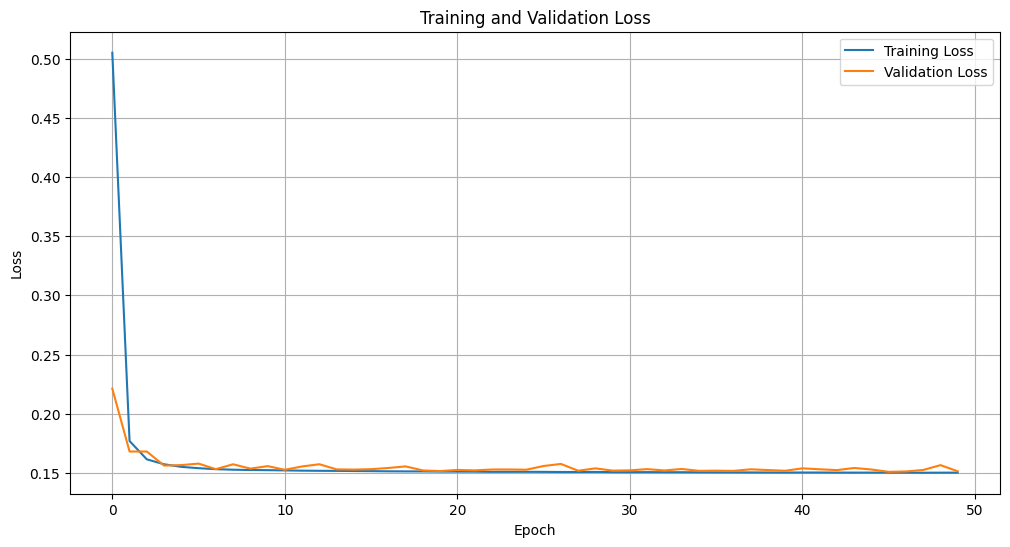

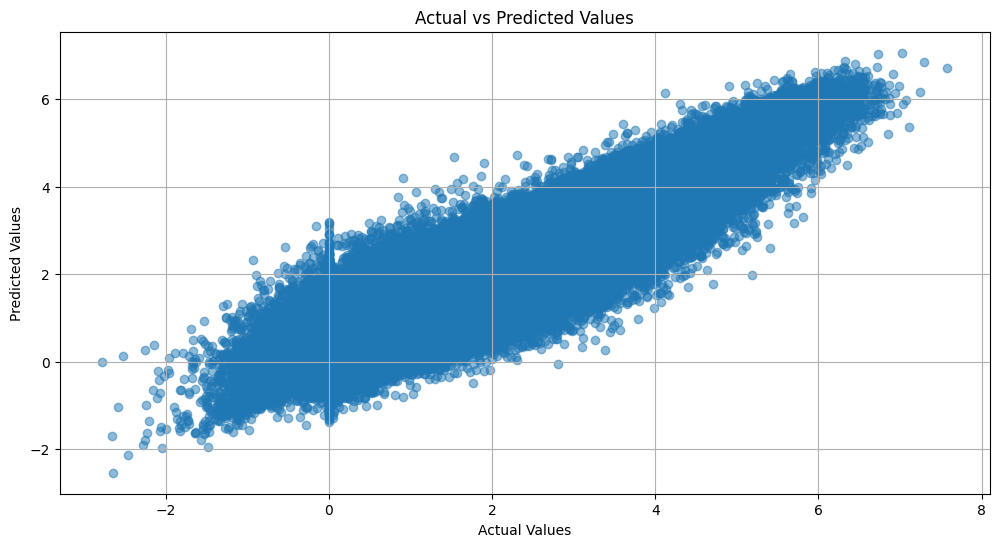

In [54]:
# Building an RNN model with GRU layers and an Attention mechanism
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Define the input shape explicitly
    layers.GRU(128, activation='relu', return_sequences=True),  # GRU layer with return_sequences=True
    Attention(),  # Attention layer to focus on important parts of the GRU output
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    layers.Dense(len(top_genes))  # Output layer: one neuron per target gene
])

# Compile the model with Adam optimizer and MSE loss function
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model on the training data and validate on the test data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set to determine its performance
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Predict gene expression on the test set
predictions = model.predict(X_test)

# Print the model summary to display its architecture
model.summary()


# Display the first few predictions for inspection
print("Predictions: ", predictions[:2])

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Print the calculated metrics
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

#### Cross-Validation

In [55]:
# Select the top 50 most variable genes based on variance across samples
df_var = df.var(axis=1).sort_values(ascending=False)
top_genes = df_var.index[:50]  # Select the top 50 most variable genes

# Use the combined data as features (X)
X = combined_features  

# Select the expression levels of the top genes as the target (y)
y = df.loc[top_genes].T.values  # Convert to numpy array

# Reshape X for GRU layer input
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialize K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store metrics
mse_scores = []
mae_scores = []
r2_scores = []
rmse_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}/{k}")
    
    # Split data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Build the model
    model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),  # Define the input shape explicitly
    layers.GRU(128, activation='relu', return_sequences=True),  # GRU layer with return_sequences=True
    Attention(),  # Attention layer to focus on important parts of the GRU output
    layers.Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation
    layers.Dense(len(top_genes))  # Output layer: one neuron per target gene
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Predict on validation data
    predictions = model.predict(X_val)
    
    # Calculate metrics
    mse = mean_squared_error(y_val, predictions)
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    rmse = np.sqrt(mse)
    
    # Store metrics
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    
    print(f"Fold {fold+1} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Compute average metrics across all folds
print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average RMSE: {np.mean(rmse_scores):.4f}")
print(f"Average R2: {np.mean(r2_scores):.4f}")


Fold 1/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
Fold 1 - MSE: 0.1518, MAE: 0.2687, RMSE: 0.3896, R2: 0.8504
Fold 2/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
Fold 2 - MSE: 0.1687, MAE: 0.2894, RMSE: 0.4107, R2: 0.8314
Fold 3/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step
Fold 3 - MSE: 0.2141, MAE: 0.3349, RMSE: 0.4627, R2: 0.7860
Fold 4/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step
Fold 4 - MSE: 0.1550, MAE: 0.2727, RMSE: 0.3937, R2: 0.8486
Fold 5/5
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
Fold 5 - MSE: 0.1929, MAE: 0.3134, RMSE: 0.4392, R2: 0.8075

Average MSE: 0.1765
Average MAE: 0.2958
Average RMSE: 0.4192
Average R2: 0.8248


### Results for single target gene

In [38]:
results = {
    'Model': ['DNN', 'LSTM ', 'GRU'],
    'MAE': [0.0152, 0.0078, 0.0098],
    'RMSE': [0.0166, 0.0107, 0.0121],
    'MSE': [0.0004, 0.0001, 0.0002],
    'R2': [0.9996, 0.9999, 0.9998]
}

df_results = pd.DataFrame(results)

# Format the DataFrame to show only 4 decimal places
df_results = df_results.round(4)

df_results


Model     MAE    RMSE     MSE      R2
0    DNN  0.0152  0.0166  0.0004  0.9996
1  LSTM   0.0078  0.0107  0.0001  0.9999
2    GRU  0.0098  0.0121  0.0002  0.9998

### Results for multiple target genes

In [63]:
results = {
    'Model': ['DNN', 'LSTM ', 'GRU'],
    'MAE': [0.4262, 0.0770, 0.2958],
    'RMSE': [0.5691, 0.1077, 0.4192],
    'MSE': [0.3244, 0.0116, 0.1765],
    'R2': [0.6782,  0.9892, 0.8248]
}

df_results = pd.DataFrame(results)

# Format the DataFrame to show only 4 decimal places
df_results = df_results.round(4)

df_results

Model     MAE    RMSE     MSE      R2
0    DNN  0.4262  0.5691  0.3244  0.6782
1  LSTM   0.0770  0.1077  0.0116  0.9892
2    GRU  0.2958  0.4192  0.1765  0.8248

### Comparing with the benchmark

In [68]:
""" Benchmark Model: r2_model_b = [0.9016,0.8332,0.8619,0.8765,0.9442]  """

from scipy import stats

# Assume r2_model_a is my lstm model and r2_model_b is previous author's lstm model
r2_model_a = np.array([0.9882,0.9798,0.9939,0.9903,0.9937])
r2_model_b = np.array([0.9016,0.8332,0.8619,0.8765,0.9442])

# Calculate the differences
differences = r2_model_a - r2_model_b

# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(r2_model_a, r2_model_b)

# Print the results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (significant difference).")
else:
    print("Fail to reject the null hypothesis (no significant difference).")


t-statistic: 6.1265
p-value: 0.0036
Reject the null hypothesis (significant difference).
